In [7]:
import pandas as pd

In [8]:
house_avg = pd.read_csv("1_house_avg.csv")
house_avg

,LCLid,energy_avg,temp_avg,windspeed_avg,humidity_avg,holiday_avg
0,MAC000002,12.045565,12.906012,3.676151,0.786746,0.283730
1,MAC000003,19.041507,14.297000,3.542851,0.777027,0.283784
2,MAC000004,1.691726,14.465552,3.601755,0.778109,0.282905
3,MAC000005,4.564345,14.301994,3.617174,0.780063,0.284144
4,MAC000006,2.848296,14.030447,3.526439,0.777201,0.283837
...,...,...,...,...,...,...
5556,MAC005562,10.438841,14.462224,3.599138,0.778336,0.281392
5557,MAC005564,4.003516,13.748559,3.616215,0.782431,0.282986
5558,MAC005565,2.895000,14.683333,4.603333,0.846667,0.000000
5559,MAC005566,17.354778,12.931637,3.659864,0.787505,0.282651


Making clusters of houses

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
parameters_scaled = scaler.fit_transform(house_avg[['energy_avg','temp_avg', 'humidity_avg', 'windspeed_avg', 'holiday_avg']])

In [11]:
parameters_scaled

array([[0.11914321, 0.42431146, 0.37198585, 0.45406327, 0.85119048],
       [0.18834037, 0.55373353, 0.29324223, 0.37557489, 0.85135135],
       [0.01673294, 0.56941617, 0.3020078 , 0.41025805, 0.84871407],
       ...,
       [0.02863457, 0.58967924, 0.85746437, 1.        , 0.        ],
       [0.17165686, 0.42669575, 0.37813401, 0.44447314, 0.84795322],
       [0.05129452, 0.46483804, 0.27895132, 0.49235914, 0.85125858]])

Elbow method

In [12]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

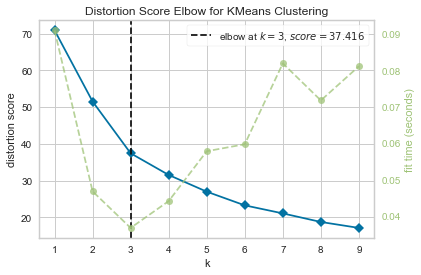

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(parameters_scaled) 
visualizer.show() 

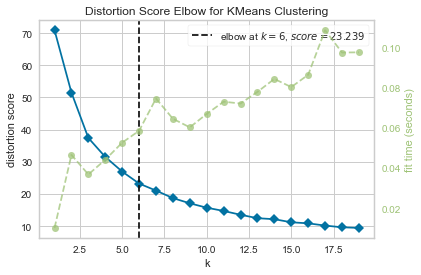

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
visualizer2 = KElbowVisualizer(km, k=(1,20))
visualizer2.fit(parameters_scaled) 
visualizer2.show() 

In [15]:
k = visualizer2.elbow_value_
k

6

Silhouette method

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Instantiate the KMeans models
km = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model
km.fit_predict(parameters_scaled)

# Calculate Silhoutte Score
score = silhouette_score(parameters_scaled, km.labels_, metric='euclidean')

# Print the score
print(score)

C:\Users\HARTE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.42422794665307667


C:\Users\HARTE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=42))

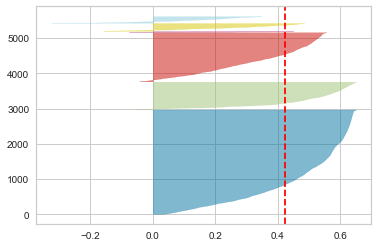

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer
km = KMeans(n_clusters=k, random_state=42)
    # q, mod = divmod(i, 2)
    
    #SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(parameters_scaled)

In [18]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

[KMeans(n_clusters=1, n_init=10), KMeans(n_clusters=2, n_init=10), KMeans(n_clusters=3, n_init=10), KMeans(n_clusters=4, n_init=10), KMeans(n_clusters=5, n_init=10), KMeans(n_clusters=6, n_init=10)]
[-70.91038237511427, -51.51143497197672, -37.4156748358438, -31.516048226672417, -26.9654830390965, -24.01084405538292]


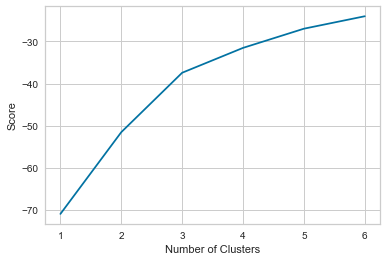

In [19]:
Nc = range(1,k+1)
kmeans = [KMeans(n_init=10, n_clusters=i) for i in Nc]
print(kmeans)

score = [kmeans[i].fit(parameters_scaled).score(parameters_scaled) for i in range(len(kmeans))]
print(score)

plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=k, max_iter=600, algorithm='lloyd', n_init=10)
kmeans.fit(parameters_scaled)
house_avg['clusters'] = kmeans.labels_
house_avg.nunique()

LCLid            5561
energy_avg       5561
temp_avg         1171
windspeed_avg    1171
humidity_avg     1145
holiday_avg       651
clusters            6
dtype: int64

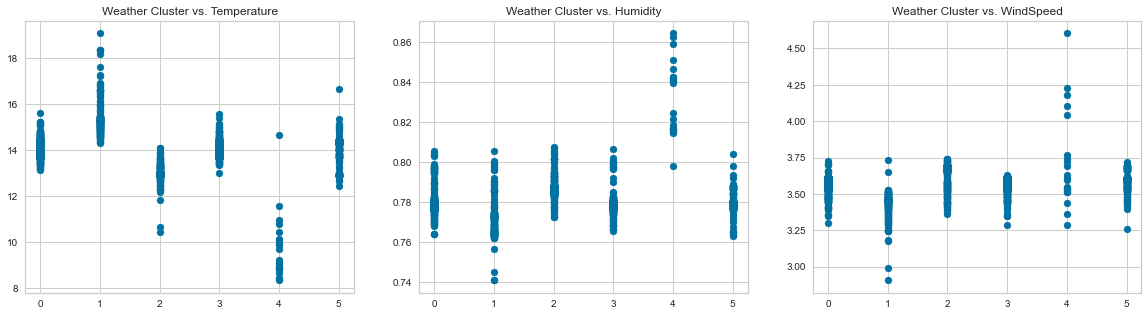

In [21]:
# Cluster Relationships with weather variables
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(house_avg['clusters'],house_avg['temp_avg'])
plt.title('Weather Cluster vs. Temperature')
plt.subplot(1, 3, 2)
plt.scatter(house_avg['clusters'],house_avg['humidity_avg'])
plt.title('Weather Cluster vs. Humidity')
plt.subplot(1, 3, 3)
plt.scatter(house_avg['clusters'],house_avg['windspeed_avg'])
plt.title('Weather Cluster vs. WindSpeed')
plt.show()

In [22]:
house_avg

,LCLid,energy_avg,temp_avg,windspeed_avg,humidity_avg,holiday_avg,clusters
0,MAC000002,12.045565,12.906012,3.676151,0.786746,0.283730,2
1,MAC000003,19.041507,14.297000,3.542851,0.777027,0.283784,3
2,MAC000004,1.691726,14.465552,3.601755,0.778109,0.282905,0
3,MAC000005,4.564345,14.301994,3.617174,0.780063,0.284144,0
4,MAC000006,2.848296,14.030447,3.526439,0.777201,0.283837,0
...,...,...,...,...,...,...,...
5556,MAC005562,10.438841,14.462224,3.599138,0.778336,0.281392,0
5557,MAC005564,4.003516,13.748559,3.616215,0.782431,0.282986,0
5558,MAC005565,2.895000,14.683333,4.603333,0.846667,0.000000,4
5559,MAC005566,17.354778,12.931637,3.659864,0.787505,0.282651,2


In [23]:
groups = house_avg.groupby('clusters')
groups.first()

,LCLid,energy_avg,temp_avg,windspeed_avg,humidity_avg,holiday_avg
clusters,,,,,,
0,MAC000004,1.691726,14.465552,3.601755,0.778109,0.282905
1,MAC000008,17.341466,15.490608,3.469337,0.769595,0.285451
2,MAC000002,12.045565,12.906012,3.676151,0.786746,0.283730
3,MAC000003,19.041507,14.297000,3.542851,0.777027,0.283784
4,MAC001477,16.242000,10.158906,4.227266,0.817109,0.273438
5,MAC000010,26.352492,12.983774,3.665747,0.788161,0.281609


In [24]:
group_lengths = []
for i in range(k):
    print(i, len(groups.get_group(i)))
    group_lengths.append(len(groups.get_group(i)))
print("Average group length =", sum(group_lengths)/len(group_lengths))

0 2964
1 184
2 779
3 1393
4 21
5 220
Average group length = 926.8333333333334


Finding the representative houses for clusters with more than average number of houses

In [25]:
parameters_scaled

array([[0.11914321, 0.42431146, 0.37198585, 0.45406327, 0.85119048],
       [0.18834037, 0.55373353, 0.29324223, 0.37557489, 0.85135135],
       [0.01673294, 0.56941617, 0.3020078 , 0.41025805, 0.84871407],
       ...,
       [0.02863457, 0.58967924, 0.85746437, 1.        , 0.        ],
       [0.17165686, 0.42669575, 0.37813401, 0.44447314, 0.84795322],
       [0.05129452, 0.46483804, 0.27895132, 0.49235914, 0.85125858]])

In [26]:
X_dist = kmeans.transform(parameters_scaled)

df = pd.DataFrame(X_dist.min(axis=1), columns=['dist'])
df['label'] = house_avg['clusters']

df

,dist,label
0,0.020520,2
1,0.049889,3
2,0.048303,0
3,0.025519,0
4,0.054970,0
...,...,...
5556,0.047450,0
5557,0.063254,0
5558,1.071719,4
5559,0.068570,2


In [27]:
house_avg['min_dist'] = df['dist']
house_avg.head()

,LCLid,energy_avg,temp_avg,windspeed_avg,humidity_avg,holiday_avg,clusters,min_dist
0,MAC000002,12.045565,12.906012,3.676151,0.786746,0.283730,2,0.020520
1,MAC000003,19.041507,14.297000,3.542851,0.777027,0.283784,3,0.049889
2,MAC000004,1.691726,14.465552,3.601755,0.778109,0.282905,0,0.048303
3,MAC000005,4.564345,14.301994,3.617174,0.780063,0.284144,0,0.025519
4,MAC000006,2.848296,14.030447,3.526439,0.777201,0.283837,0,0.054970


In [28]:
groups = house_avg.groupby('clusters')
groups.get_group(0).sort_values('min_dist')

,LCLid,energy_avg,temp_avg,windspeed_avg,humidity_avg,holiday_avg,clusters,min_dist
1955,MAC001958,6.106586,14.273594,3.595511,0.779569,0.282748,0,0.007932
4774,MAC004777,6.157570,14.342633,3.593223,0.778374,0.283453,0,0.008518
2075,MAC002078,6.079942,14.250853,3.593671,0.779952,0.283414,0,0.009658
4750,MAC004753,5.757426,14.345251,3.592496,0.778336,0.282640,0,0.009765
1996,MAC001999,5.595885,14.275648,3.599104,0.779392,0.283200,0,0.009896
...,...,...,...,...,...,...,...,...
1626,MAC001629,1.828996,14.325774,3.445736,0.802755,0.279245,0,0.214445
5115,MAC005118,8.755412,14.237824,3.455649,0.803511,0.282443,0,0.214934
1867,MAC001870,5.766214,14.742101,3.413193,0.803403,0.281513,0,0.226903
2015,MAC002018,5.967789,14.772456,3.356535,0.804430,0.285088,0,0.250945


In [29]:
cluster_index_for_representation = []
for i in range(k):
    print(i, len(groups.get_group(i)))
    group_lengths.append(len(groups.get_group(i)))
avg_group_length = sum(group_lengths)/len(group_lengths)
for i in range(k):
    if len(groups.get_group(i)) > avg_group_length:
        cluster_index_for_representation.append(i)
print(cluster_index_for_representation)

0 2964
1 184
2 779
3 1393
4 21
5 220
[0, 3]


In [30]:
avg_group_length = int(round(avg_group_length, 0))
avg_group_length

927

In [31]:
dataset_repre_houses = pd.DataFrame(columns = ["LCLid", "energy_avg", "temp_avg", "humidity_avg", "windspeed_avg", "holiday_avg", "clusters", "min_dist"])
for i in range(k):
    if i in cluster_index_for_representation:
        temp = groups.get_group(i).sort_values('min_dist')[:avg_group_length]
        dataset_repre_houses = pd.concat([dataset_repre_houses,temp], ignore_index=True)
    else:
        temp = groups.get_group(i).sort_values('min_dist')[:]
        dataset_repre_houses = pd.concat([dataset_repre_houses,temp], ignore_index=True)
dataset_repre_houses

,LCLid,energy_avg,temp_avg,humidity_avg,windspeed_avg,holiday_avg,clusters,min_dist
0,MAC001958,6.106586,14.273594,0.779569,3.595511,0.282748,0,0.007932
1,MAC004777,6.157570,14.342633,0.778374,3.593223,0.283453,0,0.008518
2,MAC002078,6.079942,14.250853,0.779952,3.593671,0.283414,0,0.009658
3,MAC004753,5.757426,14.345251,0.778336,3.592496,0.282640,0,0.009765
4,MAC001999,5.595885,14.275648,0.779392,3.599104,0.283200,0,0.009896
...,...,...,...,...,...,...,...,...
3053,MAC005406,70.980437,14.315184,0.777108,3.539004,0.283765,5,0.360641
3054,MAC003329,69.612081,12.979002,0.788177,3.663340,0.282150,5,0.365543
3055,MAC000450,72.213097,13.510475,0.777268,3.518694,0.287411,5,0.375413
3056,MAC002155,91.654794,16.684545,0.788864,3.258977,0.278409,5,0.649275


In [32]:
# based in average utilization rates, we communitites of houses (clusters)
# hetrogeneous communities
# all clusters milake is an area

In [33]:
dataset_repre_houses.to_csv("2_dataset_repre_houses.csv")